## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

## Read the dataset

In [3]:

datatraining = pd.read_csv("datatraining.txt", header=0)

In [4]:
datatraining.shape

(8143, 7)

In [5]:
datatraining.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
datatraining.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


## Data Preparation

#### Handling Missing Values

In [7]:
datatraining.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [8]:
datatraining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


#### Split the date and check the head and drop the date column

In [9]:
import pandas as pd

# Load the dataset (assuming it's named datatraining)
datatraining = pd.read_csv("datatraining.txt")

# Split the 'date' column into 'year', 'month', 'day', and 'Time'
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatraining['year'] = datatraining['date'].dt.year
datatraining['month'] = datatraining['date'].dt.month
datatraining['day'] = datatraining['date'].dt.day
datatraining['Time'] = datatraining['date'].dt.strftime("%H:%M:%S")

# Check the head of the DataFrame
print(datatraining.head())

# Drop the 'date' column
datatraining = datatraining.drop(columns=['date'])

                 date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  year  month  day      Time  
1          1  2015      2    4  17:51:00  
2          1  2015      2    4  17:51:59  
3          1  2015      2    4  17:53:00  
4          1  2015      2    4  17:54:00  
5          1  2015      2    4  17:55:00  


In [10]:
# Verify that the 'date' column is dropped
print(datatraining.head())

   Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy  year  \
1        23.18   27.2720  426.0  721.25       0.004793          1  2015   
2        23.15   27.2675  429.5  714.00       0.004783          1  2015   
3        23.15   27.2450  426.0  713.50       0.004779          1  2015   
4        23.15   27.2000  426.0  708.25       0.004772          1  2015   
5        23.10   27.2000  426.0  704.50       0.004757          1  2015   

   month  day      Time  
1      2    4  17:51:00  
2      2    4  17:51:59  
3      2    4  17:53:00  
4      2    4  17:54:00  
5      2    4  17:55:00  


In [11]:
datatraining.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,Time
1,23.18,27.2720,426.0,721.25,0.004793,1,2015,2,4,17:51:00
2,23.15,27.2675,429.5,714.00,0.004783,1,2015,2,4,17:51:59
3,23.15,27.2450,426.0,713.50,0.004779,1,2015,2,4,17:53:00
4,23.15,27.2000,426.0,708.25,0.004772,1,2015,2,4,17:54:00
5,23.10,27.2000,426.0,704.50,0.004757,1,2015,2,4,17:55:00


## 2. Exploratory Data Analysis

In [12]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
 6   year           8143 non-null   int64  
 7   month          8143 non-null   int64  
 8   day            8143 non-null   int64  
 9   Time           8143 non-null   object 
dtypes: float64(5), int64(4), object(1)
memory usage: 699.8+ KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,Time
1,23.18,27.2720,426.0,721.25,0.004793,1,2015,2,4,17:51:00
2,23.15,27.2675,429.5,714.00,0.004783,1,2015,2,4,17:51:59
3,23.15,27.2450,426.0,713.50,0.004779,1,2015,2,4,17:53:00
4,23.15,27.2000,426.0,708.25,0.004772,1,2015,2,4,17:54:00
5,23.10,27.2000,426.0,704.50,0.004757,1,2015,2,4,17:55:00


The text files has seven columns as date, temperature, humidity, light, CO2, humidity ratio and occupancy.

Temperature in Celsius.

Relative humidity as a percentage.

Light measured in lux.

Carbon dioxide measured in parts per million.

Humidity ratio, derived from temperature and relative humidity measured in kilograms of water vapor per kilogram of air.
Occupancy as either 1 for occupied or 0 for not occupied.

For training and testing the models, I will use datatraining(8143 instances) as training, datatest(2665 instances) as validation and datatest2(9752 instances) as test data.

#### 2.1.Descriptive statistical

In [13]:

datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.0,8143.0,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330,2015.0,2.0,7.075525
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982,0.0,0.0,1.674896
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,2015.0,2.0,4.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000,2015.0,2.0,6.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000,2015.0,2.0,7.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000,2015.0,2.0,8.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000,2015.0,2.0,10.000000


Since we have low values like humidity_ratio and high values like light and CO2, we should normalize the data to simplfy the learning process

In [14]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

## 2.2.Visual Analysis

##### 2.2.1.BoxPlot

Univariate analysis:
Univariate analysis is a statistical method used to analyse a single variable in a dataset.

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


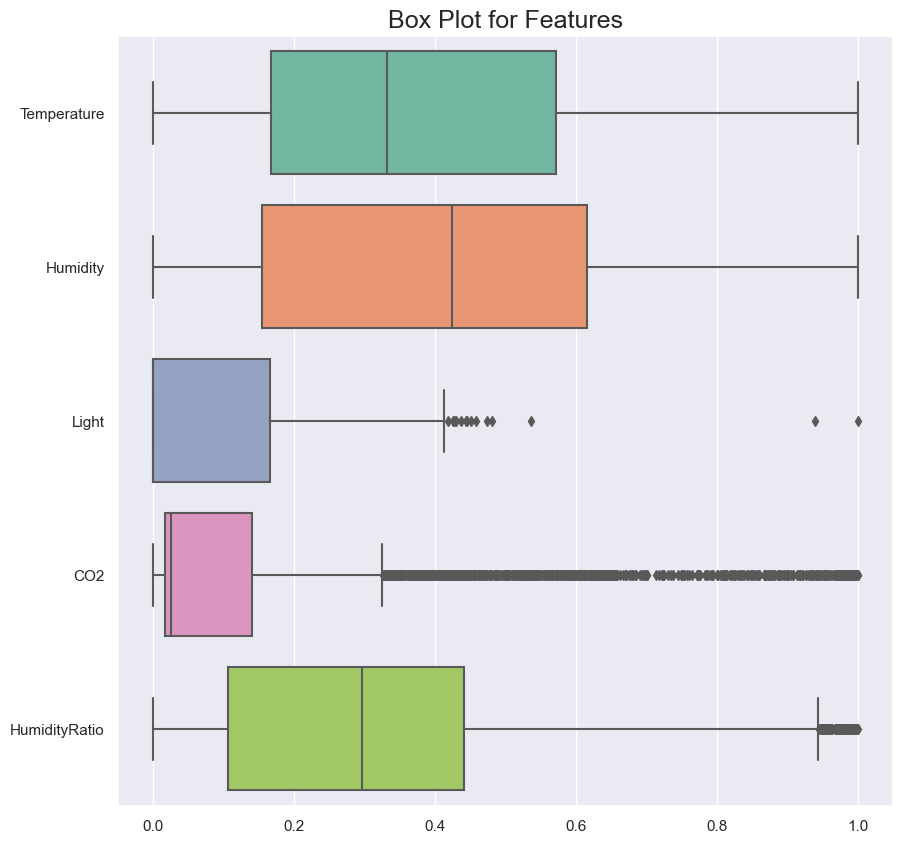

In [15]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['day','month','year','Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['day','month','year','Occupancy'],axis=1).describe())
plt.show()

##### 2.2.2.heatmap

Multivariate analysis :
Multivariate analysis is a statistical technique used to analyse data that involves more than two variables. 

C:\Users\rajes\AppData\Local\Temp\ipykernel_9716\765253158.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean      0.387341     0.401676     0.077292     0.119942       0.312576   
std       0.243281     0.247233     0.125947     0.194536       0.224186   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.167464     0.154431     0.000000     0.016246       0.106304   
50%       0.332536     0.423623     0.000000     0.025220       0.296338   
75%       0.571770     0.616307     0.165795     0.139925       0.441308   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


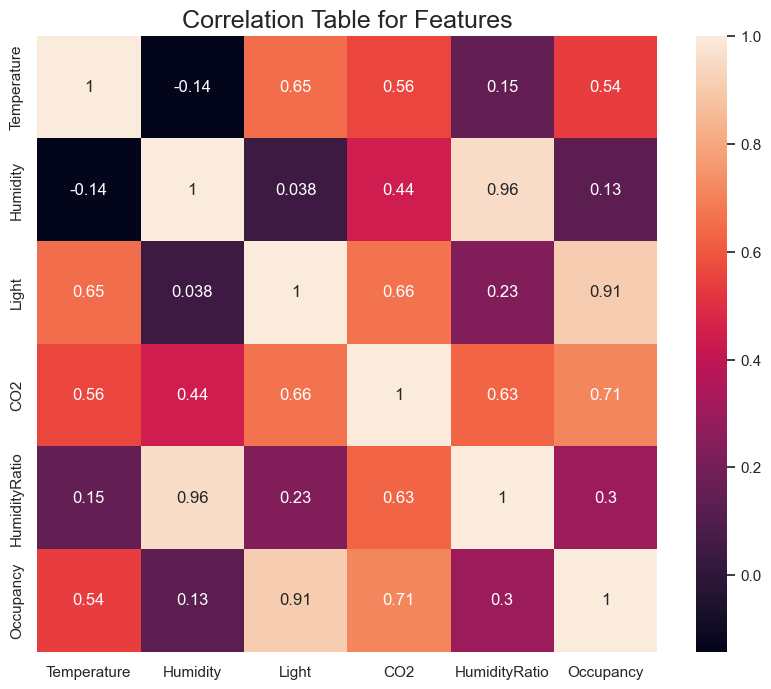

In [16]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
sns.heatmap(datatraining.drop(['month', 'year', 'day'],axis=1).corr(), annot=True)
print(datatraining.drop(['month', 'year', 'day'],axis=1).describe())

plt.show()

We can see the correlations between occupancy and the others. As I expected, light value is more correlated with occupancy than others.

##### 2.2.3.scatterplot

Bivariate analysis:
Bivariate analysis is a statistical method used to analyse the relationship between two variables in a dataset.

In [17]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

Let's look on the 4-dimensional plot for occupancy. The 4th dimension is size of dots here and I used light value as 4th dimension. The higher light will lead to bigger dots and the lower light will lead to smaller dots. You can use your mouse to change your perspective and take a closer look on the graph.

##### 2.2.4.countplot

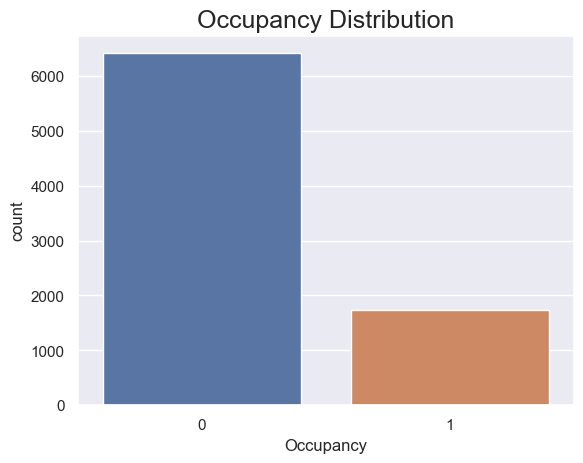

In [18]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

Our data is unbalanced, so we need to find another relations between features to strengthen our predictions. I have a question at this point, is there any relation between occupancy and the hour of the day? Let's look into it.

In [19]:
hours_1 = []
hours_0 = []

for time in datatraining[datatraining['Occupancy'] == 1]['Time']:
    hours_1.append(int(time.split(':')[0]))

for time in datatraining[datatraining['Occupancy'] == 0]['Time']:
    hours_0.append(int(time.split(':')[0]))

# Now you have hours_1 and hours_0 containing the hour values for each Occupancy class

##### 2.2.5.distplot

C:\Users\rajes\AppData\Local\Temp\ipykernel_9716\2800830631.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\rajes\AppData\Local\Temp\ipykernel_9716\2800830631.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




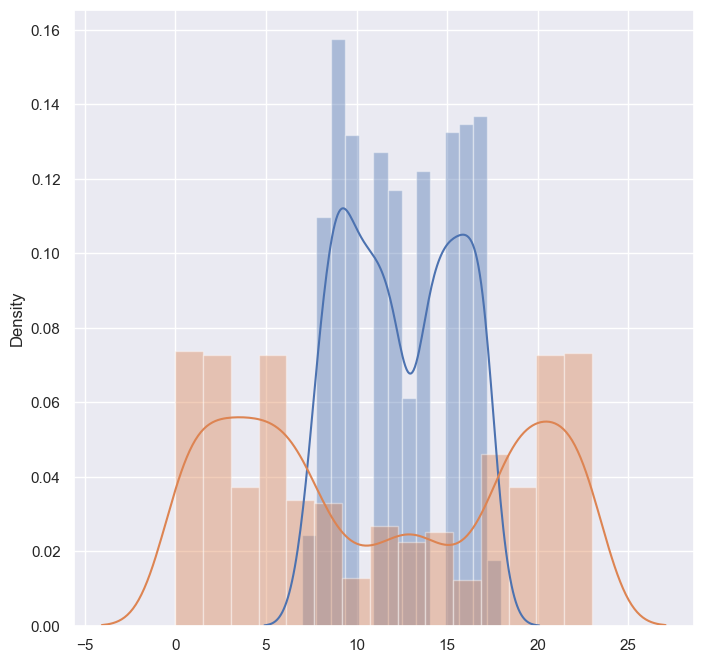

In [20]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

From above histogram, what can you say? Between 07:00 and 18:00 there are occupants in the environment or not. But the time come to non-working hours, then we can absolutely say that there is no occupant. With this information, I will create a new feature from date column as day period.

07:00 - 18:00 working hour (labeled as 1)
rest of the day non-working hour (labeled as 0)

In [21]:
datatraining['period_of_day'] = [1 if (7 <= int(str(i).split(":")[0]) <= 17) else 0 for i in datatraining['day']]
datatraining.sample(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,year,month,day,Time,period_of_day
3636,0.167464,0.118226,0.000000,0.018722,0.018498,0,2015,2,7,06:26:00,1
4974,0.081340,0.650129,0.000000,0.011914,0.438649,0,2015,2,8,04:44:00,1
2974,0.382775,0.116736,0.000000,0.069472,0.058710,0,2015,2,6,19:24:00,0
5283,0.093301,0.617797,0.015521,0.012533,0.415570,0,2015,2,8,09:53:00,1
7272,0.502392,0.867136,0.000000,0.541080,0.770495,0,2015,2,9,19:01:59,1
766,0.444179,0.282564,0.000000,0.022435,0.220152,0,2015,2,5,06:36:00,0
5178,0.047847,0.639401,0.000000,0.014699,0.419922,0,2015,2,8,08:08:00,1
5263,0.069378,0.632249,0.095387,0.016711,0.420421,0,2015,2,8,09:33:00,1
6855,0.598086,0.764108,0.295214,0.645366,0.710257,1,2015,2,9,12:04:59,1
5209,0.047847,0.641636,0.003880,0.011501,0.421743,0,2015,2,8,08:38:59,1


### Creating new Column for Year Month and Day

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder_x=LabelEncoder()

In [23]:
datatraining['year']=label_encoder_x.fit_transform(datatraining['year'])
datatraining['month']=label_encoder_x.fit_transform(datatraining['month'])
datatraining['day']=label_encoder_x.fit_transform(datatraining['day'])

In [24]:
datatraining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
 6   year           8143 non-null   int64  
 7   month          8143 non-null   int64  
 8   day            8143 non-null   int64  
 9   Time           8143 non-null   object 
 10  period_of_day  8143 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 763.4+ KB


## Splitting data into train and test:
The ‘X’ corresponds to independent features and ‘y’ corresponds to the target variable.

In [25]:
y=datatraining.iloc[:,5:6].values
x=datatraining.drop('Occupancy' , axis=1)

In [26]:
x.shape

(8143, 10)

In [27]:
y.shape

(8143, 1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
x_test.shape

(1629, 10)

In [31]:
x_train.shape

(6514, 10)

In [32]:
y_train.shape

(6514, 1)

In [33]:
y_test.shape

(1629, 1)

#### Scaling Independent Varaiables

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load your dataset, you can replace 'your_dataset.csv' with the actual file path
datatraining = pd.read_csv("datatraining.txt")

# Assuming 'Occupancy' is your target variable and you have other columns as features
# Replace 'Occupancy' with your actual target column name
X = datatraining.drop(columns=['date'])
y = datatraining['date']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Now, X_train and X_test contain scaled feature data



## 3. Model Building

#### Training The Model In Multiple Algorithms

1.KNN Model

2.Support vector machine model

3.Decision Tree

4.Logistic Regression

In [35]:
print(datatraining.head())


                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [36]:
# 1. Split the data into X (features) and y (target variable)
X = datatraining.drop(columns=['Occupancy', 'date'])
y = datatraining['Occupancy']

# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train and evaluate classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)


# Report the accuracy of each classifier
print(f"KNN Accuracy: {knn_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"LogisticRegression Accuracy: {lr_accuracy}")



KNN Accuracy: 0.9901780233271946
SVM Accuracy: 0.9883364027010436
Decision Tree Accuracy: 0.992633517495396
LogisticRegression Accuracy: 0.9877225291589933


## Testing Model With Multiple Evaluation Metrics

##### 1.Decision tree

In [37]:
from sklearn.metrics import accuracy_score,classification_report
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

# make predictions on the test data
y_pred = decisiontree.predict(X_test)

#calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)
print("classification_report:\n", report)

Accuracy score: 0.992633517495396
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1286
           1       0.98      0.99      0.98       343

    accuracy                           0.99      1629
   macro avg       0.99      0.99      0.99      1629
weighted avg       0.99      0.99      0.99      1629



### 2.Logistic Regression

In [38]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = reg.predict(X_test)

#calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)
print("classification_report:\n", report)

Accuracy score: 0.9877225291589933
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1286
           1       0.95      1.00      0.97       343

    accuracy                           0.99      1629
   macro avg       0.97      0.99      0.98      1629
weighted avg       0.99      0.99      0.99      1629



### 3.Super vector machine model

In [39]:
from sklearn.metrics import accuracy_score,classification_report
svm = SVC()
svm.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm.predict(X_test)

#calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)
print("classification_report:\n", report)

Accuracy score: 0.9883364027010436
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1286
           1       0.96      0.99      0.97       343

    accuracy                           0.99      1629
   macro avg       0.98      0.99      0.98      1629
weighted avg       0.99      0.99      0.99      1629



In [40]:
from sklearn.metrics import accuracy_score,classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# make predictions on the test data
y_pred = knn.predict(X_test)

#calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy score:", accuracy)
print("classification_report:\n", report)

Accuracy score: 0.9901780233271946
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1286
           1       0.96      1.00      0.98       343

    accuracy                           0.99      1629
   macro avg       0.98      0.99      0.99      1629
weighted avg       0.99      0.99      0.99      1629



In [41]:
import pickle
pickle.dump(decisiontree,open("ML-occupancy-rates.pkl",'wb'))

In [42]:
# Get feature importances from the Decision Tree classifier
feature_importances = dt_classifier.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Temperature, Importance: 0.014867565144227945
Feature: Humidity, Importance: 0.00540266460922813
Feature: Light, Importance: 0.9467977927039728
Feature: CO2, Importance: 0.029674363891398634
Feature: HumidityRatio, Importance: 0.0032576136511725255


In [43]:
decisiontree.predict([[20,4,35,5,2,]])

c:\Python310\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0], dtype=int64)